# EDA for Segment

Description

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import os
import sys

from pathlib import Path

path = (
    Path
    .cwd()
    .parent
    .parent
    .joinpath('warbler')
    .as_posix()
)

os.chdir(path)
sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns

from constant import PROJECTION
from datatype.dataset import Dataset
from matplotlib import pyplot as plt

In [3]:
plt.style.use('science')

In [4]:
dataset = Dataset('ignore')
dataframe = dataset.load()

In [5]:
folders = dataframe.folder.unique()

In [6]:
def get_recording_count(dataframe):
    recordings = []
    
    for folder in folders:
        subset = dataframe[dataframe.folder == folder]

        recordings.append(
            len(
                subset.filename.unique()
            )
        )

    return recordings

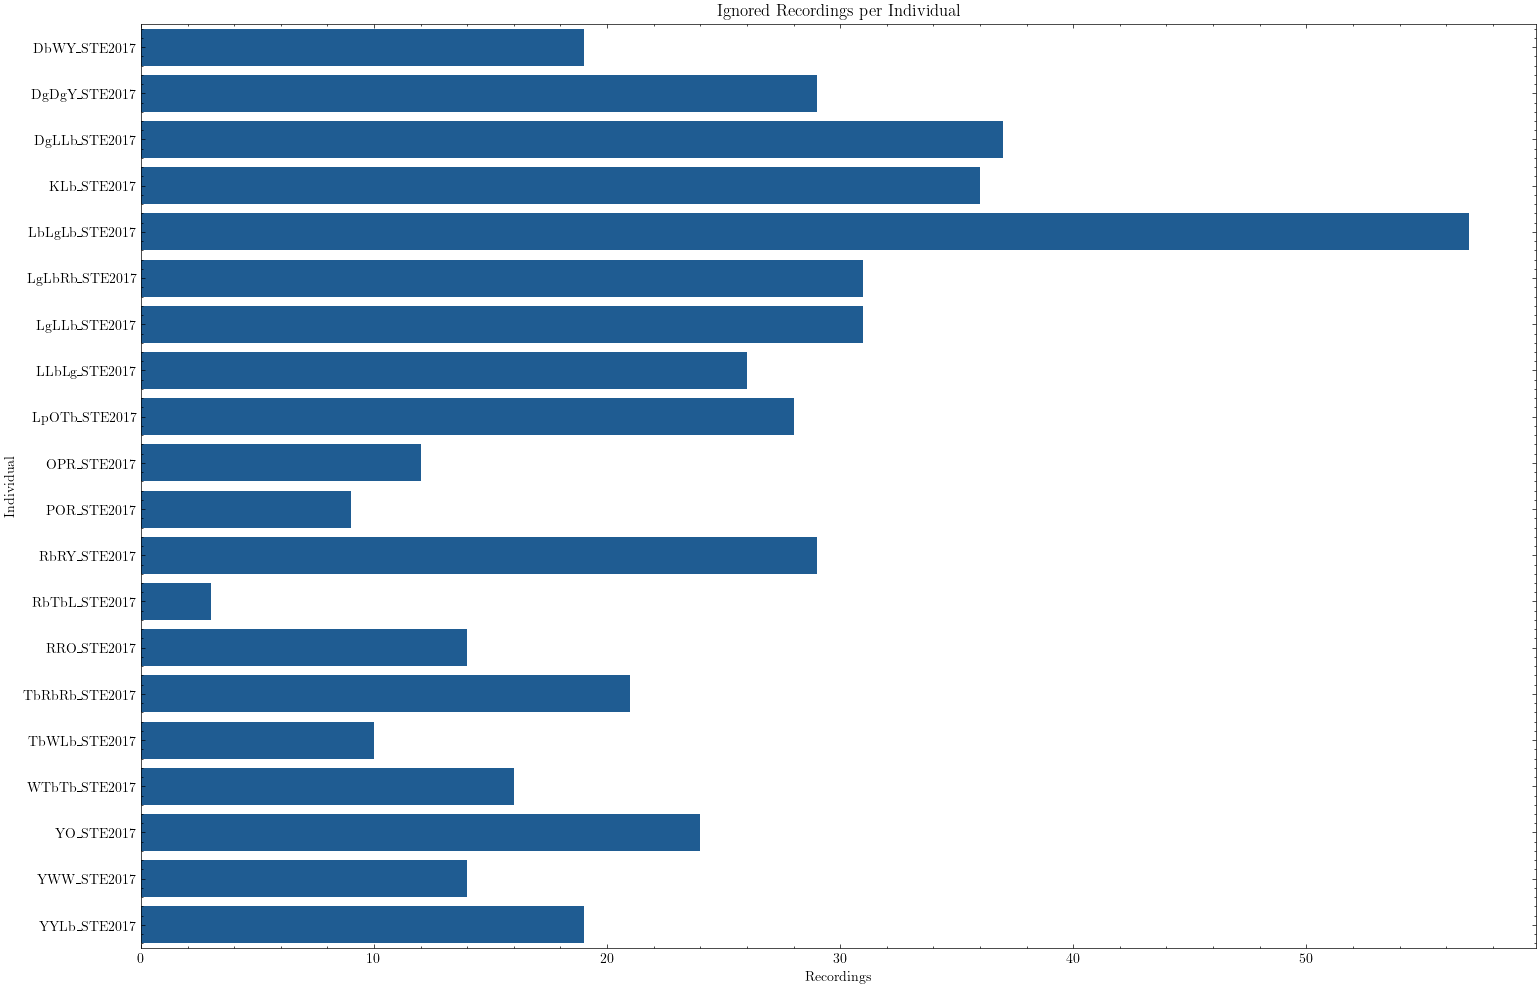

In [7]:
recordings = get_recording_count(dataframe)

fig, ax = plt.subplots(
    figsize=(18, 12)
)

ax.set_title('Ignored Recordings per Individual')
ax.set_xlabel('Recordings')
ax.set_ylabel('Individual')

sns.barplot(x=recordings, y=folders, orient='h')

filename = 'ignore_recordings_per_individual.png'
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

plt.show()
plt.close()